**ALL DATA CAME FROM:** <br>
Morgan, Malcolm, Anable, Jillian, & Lucas, Karen. (2021). A place-based carbon calculator for England. Presented at the 29th Annual GIS Research UK Conference (GISRUK), Cardiff, Wales, UK (Online): Zenodo. http://doi.org/10.5281/zenodo.4665852

#### Imports

In [2]:
import os
import pandas as pd
from visutils import *
from utils import *

DATA_DIR = '../data/'
LSOA_DIR = 'lsoa_csvs/'

zipfiles = [DATA_DIR + z for z in os.listdir(DATA_DIR) if '.zip' in z]
show_data_dir(zipfiles)

File Name                                             Modified             Size
la_averages.csv                                2021-07-07 23:07:04       330864
metadata.csv                                   2021-06-29 17:10:30        13936
oac_averages.csv                               2021-07-07 23:07:04         8757
PBCC_LSOA_data.csv                             2021-07-07 23:15:24     29643578



#### Load Data

In [3]:
extract_all_from_zip(zipfiles[0], path=DATA_DIR+LSOA_DIR)

In [4]:
dfs = load_dfs(zipfiles[0])
dfs.keys()

dict_keys(['la_averages', 'metadata', 'oac_averages', 'PBCC_LSOA_data'])

In [5]:
for col in dfs['PBCC_LSOA_data'].columns:
    print(col)

LSOA11
LSOA11NM
SOAC11NM
LAD17CD
LAD17NM
WD18NM
gas_percap_2010
gas_percap_2011
gas_percap_2012
gas_percap_2013
gas_percap_2014
gas_percap_2015
gas_percap_2016
gas_percap_2017
gas_percap_2018
elec_percap_2010
elec_percap_2011
elec_percap_2012
elec_percap_2013
elec_percap_2014
elec_percap_2015
elec_percap_2016
elec_percap_2017
elec_percap_2018
other_heat_percap_2011
flights_percap_2018
nutrition_kgco2e_percap
other_shelter_kgco2e_percap
consumables_kgco2e_percap
recreation_kgco2e_percap
services_kgco2e_percap
commute_noncar_percap
car_percap_2010
car_percap_2011
car_percap_2012
car_percap_2013
car_percap_2014
car_percap_2015
car_percap_2016
car_percap_2017
car_percap_2018
van_percap_2010
van_percap_2011
van_percap_2012
van_percap_2013
van_percap_2014
van_percap_2015
van_percap_2016
van_percap_2017
van_percap_2018
cars_percap_2010
cars_percap_2011
cars_percap_2012
cars_percap_2013
cars_percap_2014
cars_percap_2015
cars_percap_2016
cars_percap_2017
cars_percap_2018
AvgCO2_cars_2010
AvgCO2

In [6]:
dfs['PBCC_LSOA_data'][['epc_score_avg', 'epc_A']]

,epc_score_avg,epc_A
0,66.1,0
1,64.0,0
2,65.2,0
3,67.0,2
4,74.6,1
...,...,...
32839,66.8,0
32840,71.6,0
32841,66.4,0
32842,68.1,0


In [7]:
# sheets_to_dfs = load_sheets(DATA_DIR + 'SAPE23DR2_2020.xlsx')
# sheets_to_dfs.keys()

In [8]:
dfs['PBCC_LSOA_data-ext'] = dfs['PBCC_LSOA_data'].rename(
    columns={
        'LSOA11': 'LSOA Code', 
        'LSOA11NM': 'LSOA Name', 
        'LAD17CD': 'LA Code (2018 boundaries)', 
        'LAD17NM': 'LA name (2018 boundaries)'
    }
)

#### Explore Data

In [9]:
# sheets_to_dfs['Mid-2020 Persons'].head()

In [10]:
dfs['PBCC_LSOA_data-ext'].head()

,LSOA Code,LSOA Name,SOAC11NM,LA Code (2018 boundaries),LA name (2018 boundaries),WD18NM,gas_percap_2010,gas_percap_2011,gas_percap_2012,gas_percap_2013,...,T2W_Underground_grade,elec_emissions_grade,gas_emissions_grade,car_emissions_grade,total_emissions_grade,flights_grade,other_heating_grade,van_grade,consumption_all_kgco2e_percap,consumption_grade
0,E01011954,Hartlepool 001A,Endeavouring social renters,E06000001,Hartlepool,De Bruce,1150.0,1080.0,1100.0,1130.0,...,C,B,D,C,A,A,C,B-,1230,A+
1,E01011969,Hartlepool 001B,Ageing suburbanites,E06000001,Hartlepool,De Bruce,1420.0,1340.0,1370.0,1390.0,...,C,C+,E-,D-,C+,B,D,B,2660,B-
2,E01011970,Hartlepool 001C,Ageing suburbanites,E06000001,Hartlepool,Hart,1260.0,1180.0,1180.0,1170.0,...,C,B-,D,E-,E,E+,A-,B+,5910,E-
3,E01011971,Hartlepool 001D,Comfortable suburbia,E06000001,Hartlepool,Hart,1160.0,1090.0,1080.0,1080.0,...,C,B,D+,E,E+,E+,A,C,5060,E+
4,E01033465,Hartlepool 001F,Comfortable suburbia,E06000001,Hartlepool,Hart,1370.0,1390.0,1280.0,1290.0,...,C,C+,E+,E+,B-,B-,B,C-,2200,B+


In [11]:
cols = ['gas_percap', 'elec_percap', 'car_percap', 'van_percap']
la_df = dfs['PBCC_LSOA_data-ext'].groupby('LA name (2018 boundaries)')

avg_dfs_UK = get_avg_dfs(dfs['PBCC_LSOA_data-ext'], cols)
avg_dfs_LA = get_avg_dfs(la_df, cols, grouped=True)

In [12]:
cols = []
for col in dfs['PBCC_LSOA_data-ext'].columns:
    if 'grade' in col or 'epc' in col:
        cols.append(col)
dataset = dfs['PBCC_LSOA_data-ext'][cols]


indices = []
for col in dataset.columns:
    for i, x in enumerate(dataset[col]):
        indices.extend([i for i, x in enumerate(dataset[col]) if x == x])

indices = list(set(indices))
dataset = dataset.iloc[indices].reset_index(drop=True)

In [ ]:
def map_grades(gradevalues, grades):
    label = 0
    for i in range(len(grades)):
        if i % 3 == 0 and i > 0:
            label += 1
            gradevalues[grades[i]] = int(label)
        else:
            gradevalues[grades[i]] = int(label)
            
    return gradevalues

grade_cols = [col for col in cols if 'grade' in dataset.columns]

grades = 'A+ A A- B+ B B- C+ C C- D+ D D- E+ E E- F+ F F-'.split()
grades.reverse()
gradevalues = map_grades({}, grades)

grades_df = dataset[grade_cols]
for col in grades_df.columns:
    grades_df.loc[:, col] = grades_df[col].map(gradevalues)

grades_df.head()

{'cars_percap_grade': 50,
 'elec_emissions_grade': 13,
 'gas_emissions_grade': 814,
 'total_emissions_grade': 46,
 'van_grade': 1}

In [ ]:
epc_cols = [col for col in dataset.columns if 'epc' in col]
epc_df = dataset.loc[:, dataset.columns.isin(epc_cols)]
epc_df.head()

In [ ]:
numeric_df = pd.concat([epc_df, grades_df], axis=1)
numeric_df.head()

,epc_total,epc_newbuild,epc_A,epc_B,epc_C,epc_D,epc_E,epc_F,epc_G,epc_score_avg,cars_percap_grade,km_percap_grade,elec_emissions_grade,gas_emissions_grade,car_emissions_grade,total_emissions_grade,flights_grade,other_heating_grade,van_grade,consumption_grade
0,615,138,0,53,178,333,46,5,0,66.1,3,2,4,2,3,5,5,3,4,5
1,266,32,0,10,73,147,32,4,0,64.0,2,2,3,1,2,3,4,2,4,4
2,191,13,0,9,57,105,16,4,0,65.2,1,2,4,2,1,1,1,5,4,1
3,242,21,2,11,82,137,9,1,0,67.0,1,1,4,2,1,1,1,5,3,1
4,500,186,1,87,323,76,12,1,0,74.6,1,0,3,1,1,4,4,4,3,4


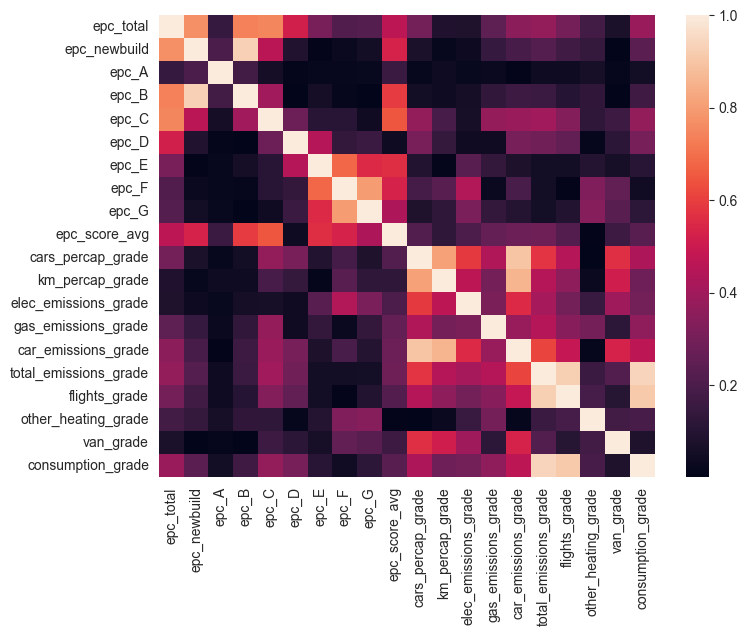

In [ ]:
sns.set_style('white')
plt.figure(figsize=(8, 6))
sns.heatmap(abs(numeric_df.corr()))
plt.show()

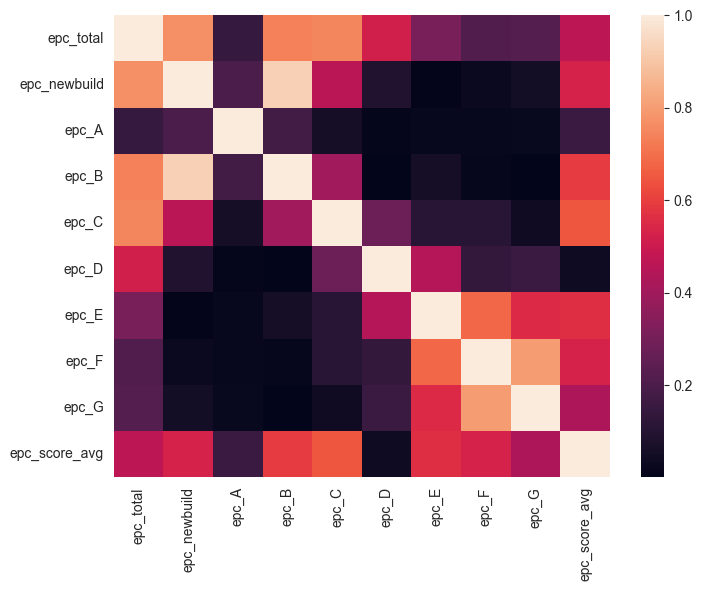

In [ ]:
sns.set_style('white')
plt.figure(figsize=(8, 6))
sns.heatmap(abs(epc_df.corr()))
plt.show()

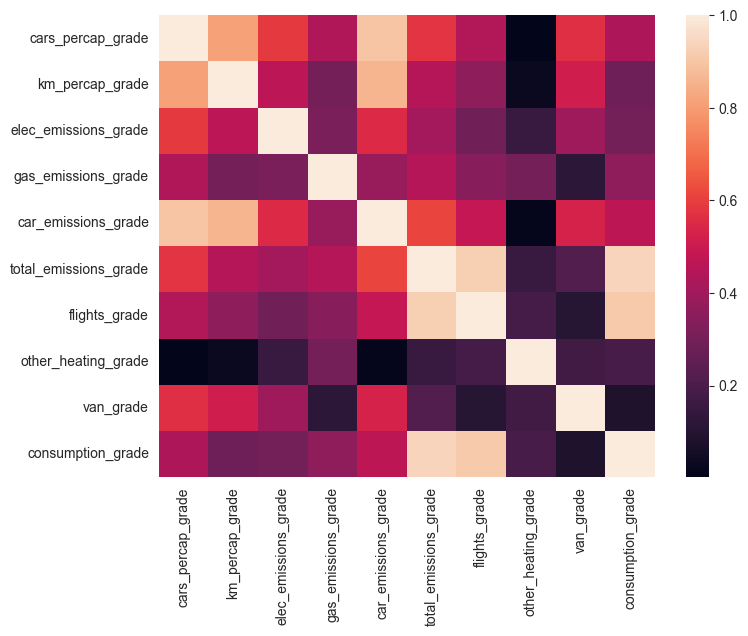

In [ ]:
sns.set_style('white')
plt.figure(figsize=(8, 6))
sns.heatmap(abs(grades_df.corr()))
plt.show()

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder

x = grades_df.drop('gas_emissions_grade', axis=1)
y = grades_df['gas_emissions_grade']

y_encoded = OneHotEncoder().fit_transform(y.values.reshape(-1, 1)).toarray()
X_train, X_test, y_train, y_test = train_test_split(x, y_encoded, test_size=0.1)

clf = RandomForestClassifier()
clf.fit(X_train, y_train)
train_score = clf.score(X_train, y_train)
test_score = clf.score(X_test, y_test)

print('RANDOM FOREST Classifier')
print(f'Train Score: {train_score}\nTest Score: {test_score}')

knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train, y_train)
train_score = clf.score(X_train, y_train)
test_score = knn.score(X_test, y_test)

print('\nKNN Classifier')
print(f'Train Score: {train_score}\nTest Score: {test_score}')

RANDOM FOREST Classifier
Train Score: 0.6654135338345865
Test Score: 0.25031328320802004

KNN Classifier
Train Score: 0.6654135338345865
Test Score: 0.2706766917293233


In [ ]:
import numpy as np
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.metrics import mean_squared_error, max_error

def missing_vals(dataset, summary=True): 
    bad_indices = []
    for col in dataset.columns:
        bad_indices.extend([i for i, x in enumerate(dataset[col]) if x != x])

    bad_indices = list(set(bad_indices))
    if summary:
        print('Number of null entires:', len(bad_indices))

    return bad_indices

data = dfs['PBCC_LSOA_data-ext'][grade_cols]
grades = pd.DataFrame({col: data[col].map(gradevalues) for col in grade_cols})
bad_indices = missing_vals(grades)

x_clean = grades[~grades.index.isin(bad_indices)]
x_missing = grades.copy()

print('The length of the array WITH missing values:', len(x_missing))
print('The length of the array WITHOUT missing values:', len(x_clean))

imputer = IterativeImputer(max_iter=10, random_state=42)
x_recovered = imputer.fit_transform(x_missing)

recovered_grades = pd.DataFrame(x_recovered, columns = grades.columns)

print('The length of the array WITH RECOVERED values:', len(missing_vals(grades, summary=False)))

Number of null entires: 924
The length of the array WITH missing values: 32844
The length of the array WITHOUT missing values: 31920
The length of the array WITH RECOVERED values: 0


#### Yearly Distribution - $\text{kg CO}_2$ per person (2010-2018)

/Users/chriscaballero/Desktop/Environmental/notebooks/visutils.py:37: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45)


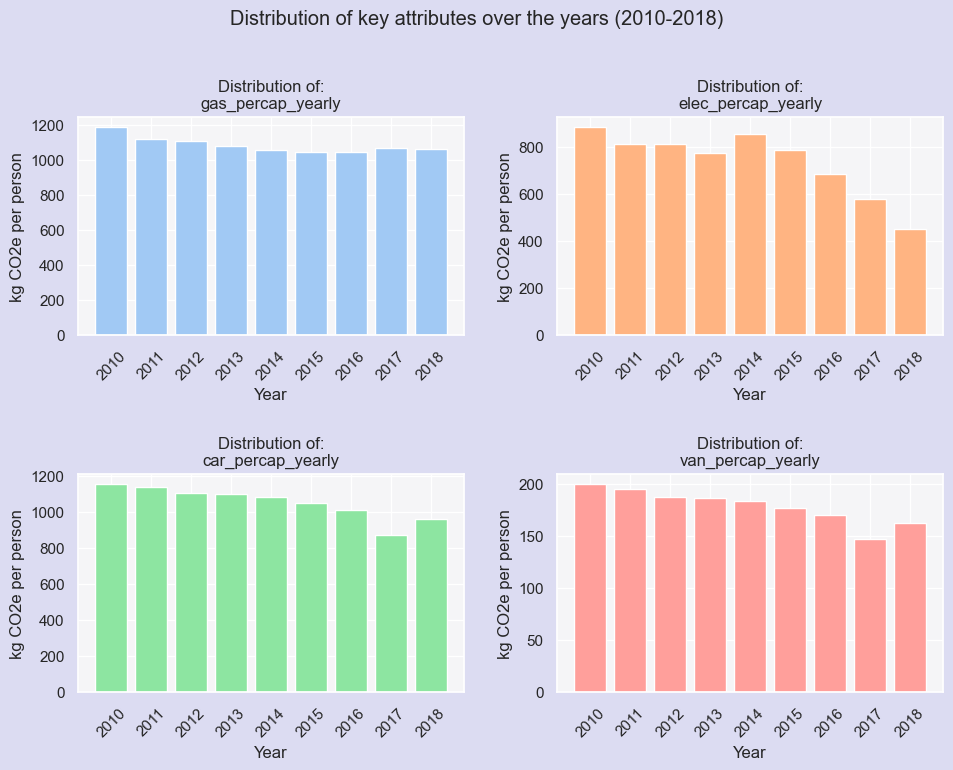

In [ ]:
plot_yearly_distribution(avg_dfs_UK)

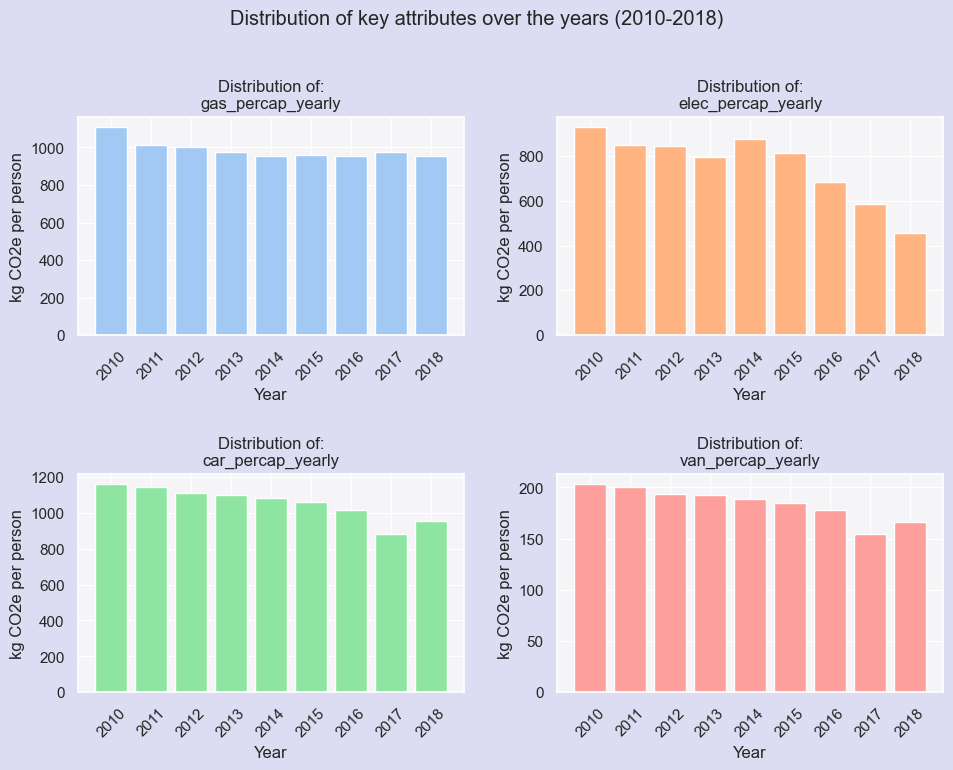

In [ ]:
plot_yearly_distribution(avg_dfs_LA)

#### Local Authority and England Average $\text{kg CO}_2$ per person

In [ ]:
cols = dfs['PBCC_LSOA_data-ext'].columns
kgco2e_UK_df, kgco2e_cols = get_kgco2e_df(dfs['PBCC_LSOA_data-ext'], cols)
kgco2e_LA_df, kgco2e_cols = get_kgco2e_df(la_df, cols, grouped=True)

Compares carbon emissions along several metrics in a stacked bar chart:
1. Nutrition
2. Consumables
3. Services
4. Consumption
5. Recreation
6. Other

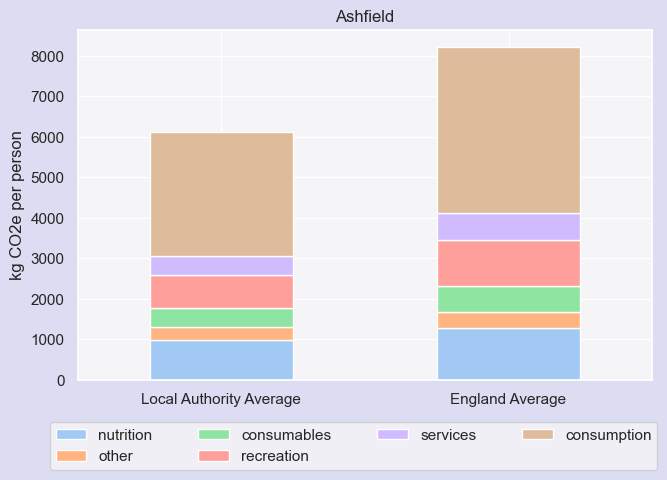

In [ ]:
kgco2e_LA_df, kgco2e_cols = get_kgco2e_df(la_df, cols=la_df.sum().columns, grouped=True, idx=4)
kgco2e_df = pd.concat([kgco2e_LA_df, kgco2e_UK_df])
plot_stacked_kgco2e(kgco2e_df, kgco2e_cols, labels=['Local Authority', 'England'])